In [4]:
from keras.models import load_model
import keras.backend as K
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [51]:
model = load_model('good-model.h5')
print('model loaded')

model loaded


In [52]:
def print_model_layers(model):
    print(model.summary())
#     print('=' * 40)
#     print(len(model.layers))
#     for layer in model.layers:
#         print(layer.input, layer.output)


In [55]:
print_model_layers(model) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 320, 3)       0         
_________________________________________________________________
norm (Lambda)                (None, 160, 320, 3)       0         
_________________________________________________________________
crop (Cropping2D)            (None, 90, 320, 3)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2 (Conv2D)               (None, 20, 77, 36)        21636     
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 37, 48)         43248     
_________________________________________________________________
conv4 (Conv2D)               (None, 6, 35, 64)         27712     
__________

Multi load
Loading  ../sim-data/sample-data
Steering len:  8036
Image loader len:  8036
Loading  ../sim-data/reverse
Steering len:  10763
Image loader len:  10763
Loading  ../sim-data/sides
Steering len:  11408
Image loader len:  11408
Loading  ../sim-data/normal
Steering len:  14017
Image loader len:  14017
All folderes loaded
Steering len:  14017
Image loader len:  14017
Choosing validation..
Before augmenting data: 9811
Using left and right camera images
Flipping images > 0.1 angle, before this: 19622
Changing brightness, before this: 21364
After augmenting data: 40986
Total validation data: 4206


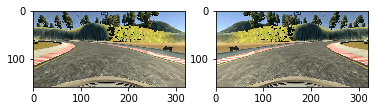

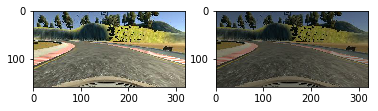

In [50]:
from generator import AugmentedMultiFolderGenerator
import matplotlib.pyplot as plt

gen = AugmentedMultiFolderGenerator(batch_size = 128, val_percent = 0.3)
gen.load("../sim-data")
gen.shuffle_training()

sample = "../sim-data/sample-data/IMG/center_2016_12_01_13_43_52_076.jpg"

image = gen.load_image(sample)
plt.subplot(1,2,1)
plt.imshow(image)

image = gen.load_flipped_image(sample)
plt.subplot(1,2,2)
plt.imshow(image)
plt.show()

image = gen.load_image(sample)
plt.subplot(1,2,1)
plt.imshow(image)

image = gen.load_changed_brightness(sample)
plt.subplot(1,2,2)
plt.imshow(image)
plt.show()


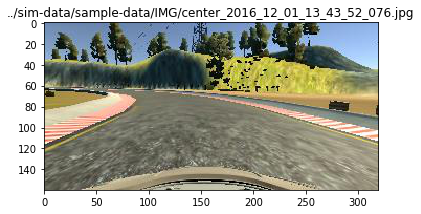

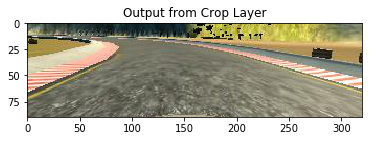

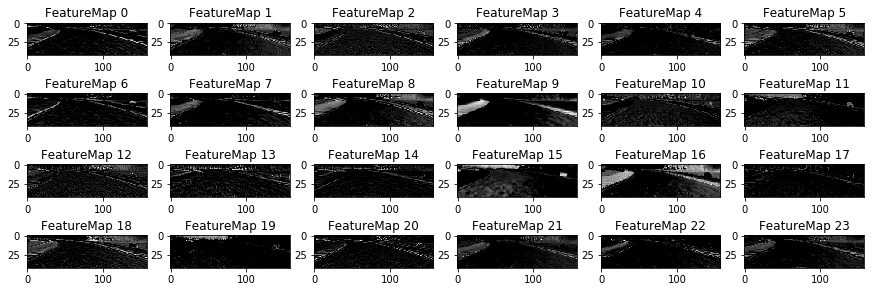

In [45]:
import os
sample = "../sim-data/sample-data/IMG/center_2016_12_01_13_43_52_076.jpg"
#sample = "../sim-data/_other-track/IMG/center_2017_04_21_12_53_44_909.jpg"
assert os.path.exists(sample)

def outputFeatureMap(sess, ac, plt_num=1):
    featuremaps = ac.shape[3]
    plt.figure(plt_num, figsize=(15,5))

    rows = featuremaps / 6
    for i in range(featuremaps):
        plt.subplot(rows, 6, i + 1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(i)) # displays the feature map number
    
        image_to_show = (ac[0,:,:,i] + 0.5) * 255
        plt.imshow(image_to_show, interpolation="nearest", cmap="gray")
    
    plt.show()
    

image = cv2.imread(sample)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title(sample)
plt.show()

image = image[None,:]

input_tensor = model.layers[0]
norm_tensor = model.layers[1]
crop_tensor = model.layers[2]
conv1_tensor = model.layers[3]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    image_norm = norm_tensor.output.eval(session=sess, feed_dict = {norm_tensor.input: image})
    image_cropped = crop_tensor.output.eval(session=sess, feed_dict = {crop_tensor.input : image_norm})

    # de-normalize image to show
    image_to_show = (image_cropped[0] + 0.5) * 255
    plt.imshow(image_to_show.astype(np.ubyte))
    plt.title('Output from Crop Layer')
    plt.show()
    
    ac = conv1_tensor.output.eval(session=sess, feed_dict = {conv1_tensor.input: image_cropped})
    outputFeatureMap(sess, ac, 3)
